**SID**: 2246615 <br/>
**Name**: OTABEK DAVRONBEKOV

## In this file, I am coping images dataset from folders HAM10000_images_part_1 and HAM10000_images_part_2 to labeled folders (classes)

In [55]:
import os

import pandas as pd
import numpy as np

import shutil

from PIL import Image
import matplotlib.pyplot as plt

In [3]:
project_path = './'

os.listdir(project_path)

['.DS_Store',
 'HAM10000_images_part_1',
 'dl_ham10000_project.ipynb',
 '.ipynb_checkpoints',
 'dataset-preprocess.ipynb',
 'HAM10000_images_part_2',
 'HAM10000_metadata.csv']

In [4]:
metadata = pd.read_csv(f'{project_path}HAM10000_metadata.csv')

### getting unique labels from dataset

In [14]:
labels = set(metadata['dx'].values)

In [15]:
print(labels)

{'mel', 'nv', 'vasc', 'bcc', 'df', 'akiec', 'bkl'}


In [18]:
os.mkdir(f'{project_path}dataset')

In [19]:
for label in labels:
    path = f'{project_path}dataset/{label}'
    os.mkdir(path)
    print(f'folder with name "{label}" is created at {path}')

folder with name "mel" is created at ./dataset/mel
folder with name "nv" is created at ./dataset/nv
folder with name "vasc" is created at ./dataset/vasc
folder with name "bcc" is created at ./dataset/bcc
folder with name "df" is created at ./dataset/df
folder with name "akiec" is created at ./dataset/akiec
folder with name "bkl" is created at ./dataset/bkl


In [21]:
dataset_folders = [
    'HAM10000_images_part_1',
    'HAM10000_images_part_2',
]

#### In the code below, I move images to labeled folders for training purposes

In [46]:
def get_image_path(folder, image_name):
  return f'{project_path}/{folder}/{image_name}.jpg'

def find_path(image_id):
  if os.path.exists(f'{project_path}/{dataset_folders[0]}/{image_id}.jpg'):
    return get_image_path(dataset_folders[0], image_id)

  return get_image_path(dataset_folders[1], image_id)

def move_image(data):
    label = data['dx']
        
    original = find_path(data['image_id'])
    target = f'{project_path}dataset/{label}/{data["image_id"]}.jpg'
    
    shutil.copyfile(original, target)

In [47]:
metadata[['dx', 'image_id']].apply(lambda row: move_image(row), axis=1)    

0        None
1        None
2        None
3        None
4        None
         ... 
10010    None
10011    None
10012    None
10013    None
10014    None
Length: 10015, dtype: object

#### displaying moved images 

akiec


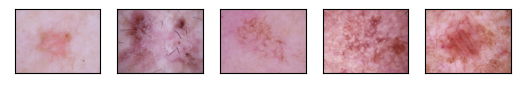

bcc


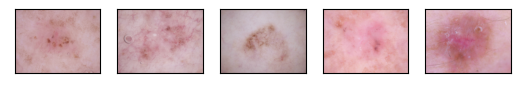

bkl


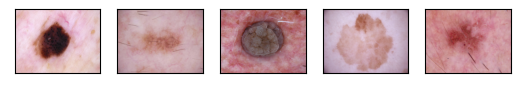

df


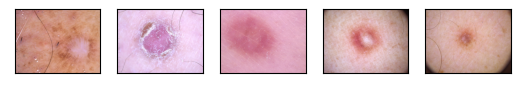

mel


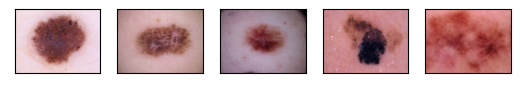

nv


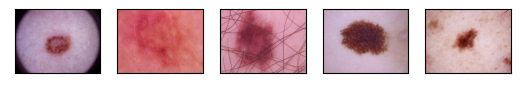

vasc


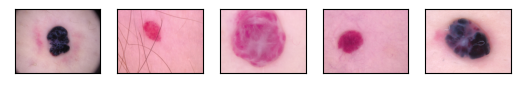

In [56]:
for dx, dx_items in metadata.sort_values(['dx']).groupby('dx'):
  plt.figure()
  print(dx)
  for i, (_, dx_item) in zip(range(5), dx_items.sample(5, random_state=1234).iterrows()):
    image_path = f'{project_path}dataset/{dx}/{dx_item["image_id"]}.jpg'
    img = np.asarray(Image.open(image_path))
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()